# This is a playground implementation of a Hierarchical Dirichet Process Mixture Model

## Generate test data

In [1]:
# define size of bar image
img_size = 5

# define amount of noise
noise_level = 0.01

# define probabilities of generating a particular number of bars
num_per_mixture = [0 ones(1,3)] ./ 3

# define number of groups (J)
num_group = 40

# define number of data items drawn from each group
num_data = 50;

In [2]:
include("../src/datasets.jl")

# generate data
(samples, bars) = generateBarsDataset(img_size, noise_level, num_per_mixture, num_group, num_data);

## Visualize some data sample

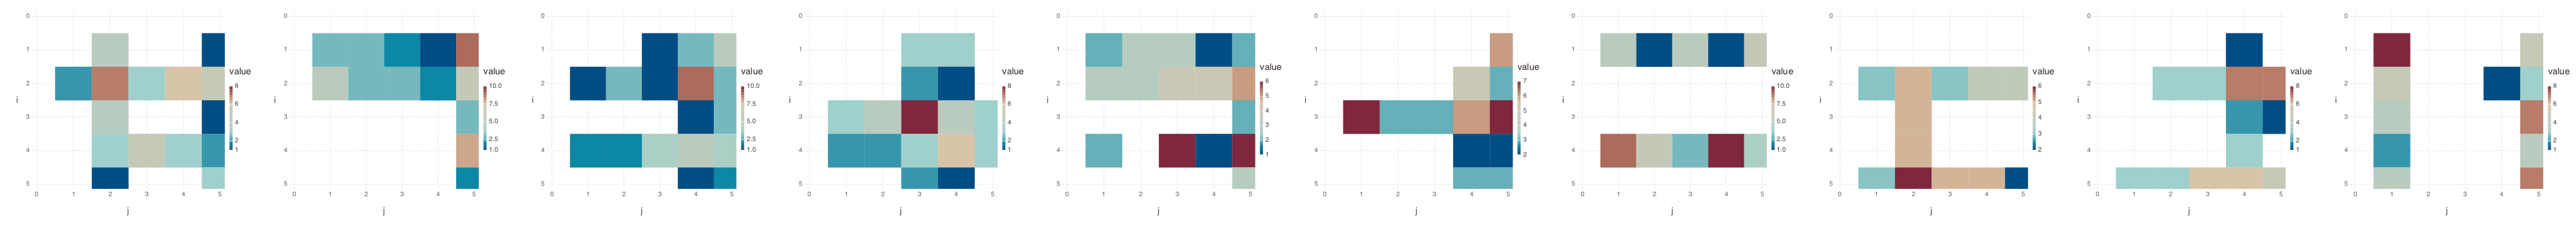

In [3]:
# visualize some sample
num_vis_images = 10

using Gadfly

x = 10cm
y = (num_vis_images + 1) * x

set_default_plot_size(y, x)

plots = Plot[]

for i in 1:num_vis_images
    
    A = zeros(img_size * img_size)
    
    for j in 1:num_data
        A[ samples[i][j] ] += 1
    end
    
    I = reshape(A, 5, 5)
    push!(plots, spy(I, Scale.x_continuous(minvalue=0, maxvalue=5), Scale.y_continuous(minvalue=0, maxvalue=5))) 
end

hstack(plots)

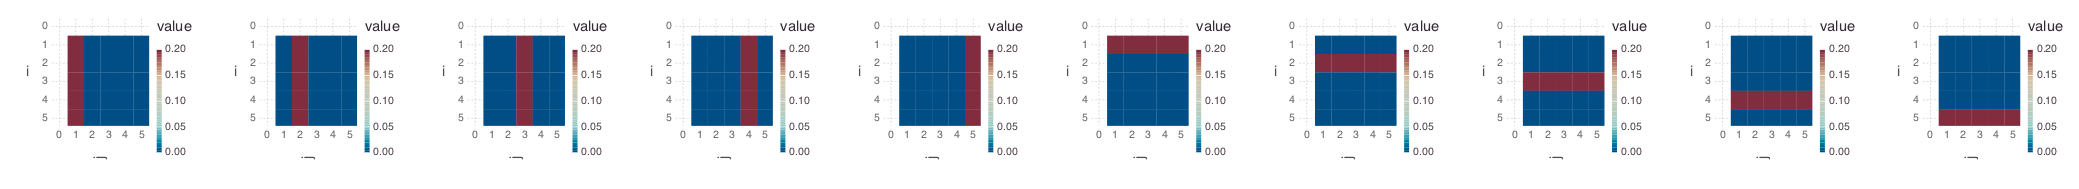

In [4]:
# visualize GT
using Gadfly

x = 5cm
y = (size(bars, 2) + 1) * x

set_default_plot_size(y, x)

plots = Plot[]

for i in 1:size(bars, 2)
    
    I = reshape(bars[:,i], 5, 5)
    push!(plots, spy(I, Scale.x_continuous(minvalue=0, maxvalue=5), Scale.y_continuous(minvalue=0, maxvalue=5))) 
end

hstack(plots)

## Load BNP.jl

In [159]:
include("../src/BNP.jl")

# train HDP using Gibbs sampling

In [162]:
# base distribution
D = img_size * img_size
H = BNP.MultinomialDirichlet(D, 1.0)

model = BNP.HDP(H, α = 1.0)

@time models = BNP.train(model, BNP.Gibbs(), BNP.RandomInitialisation(k = 10), samples);

elapsed time: 56.514137342 seconds (8547784640 bytes allocated, 64.47% gc time)


In [158]:
models

# visualize infered topics

In [161]:
using Gadfly

x = 5cm
y = (length(G) + 1) * x

set_default_plot_size(y, x)

plots = Plot[]

G = models[100].G

for i in 1:length(G)
    I = reshape(full(G[i].counts), 5, 5)
    push!(plots, spy(I, Scale.x_continuous(minvalue=0, maxvalue=5), Scale.y_continuous(minvalue=0, maxvalue=5))) 
end

hstack(plots)

LoadError: G not defined
while loading In[161], in expression starting on line 4